<a href="https://colab.research.google.com/github/yexf308/MachineLearning/blob/main/Module1/SVM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines
## The kernel trick 

In [ ]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


When linear classifier not appropriate, what shall we do?

<img src="https://github.com/yexf308/MAT592/blob/main/image/linear_non_separate.png?raw=true" width="300" />


<img src="https://github.com/yexf308/MAT592/blob/main/image/map_to_polar.png?raw=true" width="800" />

<img src="https://github.com/yexf308/MAT592/blob/main/image/map_to_high_d.png?raw=true" width="800" />

### Main idea
- Transform the training data onto a higher dimensional feature space via a
mapping function $\phi: \mathbb{R}^d \leftarrow \mathbb{R}^D$, where the data is separable in feature space. 

- train a linear SVM model to classify the data in the transformed feature
space in $\mathbb{R}^D$.

- use feature mapping $\phi$ to transform new data to classify it using the
trained linear SVM model.

<img src="https://github.com/yexf308/MAT592/blob/main/image/map_to_feature_space.png?raw=true" width="800" />



Learn classifier linear in $\mathbf{w}$ in $\mathbb{R}^D$: 
$$ f(x)= \phi(\mathbf{x})\cdot\mathbf{w}+w_0$$
where $\phi(\mathbf{x})$ is the feature map. 

$$ \boxed{\min_{\mathbf{w}\in \mathbb{R}^D, w_0\in \mathbb{R}} \underbrace{\lambda\sum_{i=1}^N \max\left\{0, 1-\mathbf{y}^{(i)} f(\mathbf{x}^{(i)})\right\} +\frac{1}{2} \|\mathbf{w}\|_2^2}_{=\text{LOSS}(\mathbf{w},w_0)}}$$

- linear classifier, $\phi(\mathbf{x}) =\mathbf{x}$. 

- quadratic classifier,
$$\phi: \mathbf{x}\rightarrow [x_1^2, \dots, x_d^2, \sqrt{2}x_1x_2, \dots, \sqrt{2}x_{d-1}x_d]\in \mathbb{R}^{\frac{d(d+1)}{2}} $$ 

### Bad news
 Then $D$ could be very large ($D\gg d$), even sometimes $D>N$, or $D=+\infty$. So it could be inefficient (or impossible) to compute $f(\mathbf{x}^{(i)})$. It is bad idea to solve it directly. 

### Mathematical formulation
Primal formulation:
$$\min_{\mathbf{w}\in\mathbb{R}^D, w_0\in \mathbb{R},\xi\in \mathbb{R}^N}\frac{1}{2}\|\mathbf{w}\|^2+ \lambda \sum_{i=1}^N \xi_i $$
  \begin{align}\text{subject to }&\mathbf{y}^{(i)}( \color{red}{\phi(\mathbf{x}^{(i)})}\mathbf{w}+w_0)\ge 1 -\xi_i, \\
 &\xi_i\ge 0, \forall i=1, \dots, N \end{align}

Prediction:  for new data $\mathbf{x}$, note $\mathbf{w}^* = \sum_{i=1}^N\alpha_iy^{(i)}\color{red}{\phi(\mathbf{x}^{(i)})} $.
 $$y = \begin{cases}1 & \sum_{i=1}^N\alpha_iy^{(i)}(\color{red}{\phi(\mathbf{x}^{(i)})})^\top \color{red}{\phi(\mathbf{x})}+w_0^*\ge 0  \\ -1 & \text{Otherwise}\end{cases}$$

Dual formulation: 

$$\max_{\alpha\in \mathbb{R}^N} \sum_{i=1}^N \alpha_i-\frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N y^{(i)}y^{(j)}\alpha_i\alpha_j \color{red}{\phi(\mathbf{x}^{(i)})^\top\phi(\mathbf{x}^{(j)})} $$
$$\text{subject to } \sum_{i=1}^N \alpha_i \mathbf{y}^{(i)}=0, 0\le \alpha_i \le \lambda, \forall i=1,\dots, N $$

Primal solution is recovered from $\alpha^*$,
$$ \mathbf{w}^*=\sum_{i=1}^N\alpha^*_iy^{(i)} \color{red}{\phi(\mathbf{x}^{(i)})}, w_0= y^{(k)} - \sum_{i=1}^N \alpha_i^{*} y^{(i)}\color{red}{\phi(\mathbf{x}^{(i)})^\top\phi(\mathbf{x}^{(k)})}$$
for any support vector $\mathbf{x}^{(k)}$.

### Good news
- $\phi(\mathbf{x})$ only occurs in pairs $\phi(\mathbf{x}^{(i)})^\top\phi(\mathbf{x}^{(j)})$.

- Once the scalar products are computed, only the $N$ dimensional vector $\alpha$ needs to be learnt; it is not necessary to learn in the
$D$ dimensional space, as it is for the primal. This is good when $N\ll D$.

- Define $\mathcal{K}(\mathbf{x}^{(i)},\mathbf{x}^{(j)})=\phi(\mathbf{x}^{(i)})^\top\phi(\mathbf{x}^{(j)})$. This is called **kernel**.

Example: 
$$ \phi: \begin{bmatrix}x_1 \\ x_2\end{bmatrix}\rightarrow \begin{bmatrix} x_1^2 \\ x_2^2 \\ \sqrt{2}x_1x_2 \end{bmatrix}$$
Then the kernel $\mathcal{K}(\mathbf{x}, \mathbf{z})=\phi(\mathbf{x})^\top \phi(\mathbf{z})=(\mathbf{x}^\top\mathbf{z})^2 $. Classifier can be learnt and applied without explicitly computing $\phi(\mathbf{x})$. All that is required is the kernel $\mathcal{K}(\mathbf{x}, \mathbf{z})$. The complexity of learning depends on $N$ (about $\mathcal{O}(N^3)$) not on $D$.

More examples: 

- Linear kernels: $\mathcal{K}(\mathbf{x}, \mathbf{z}) = \mathbf{x}^\top\mathbf{z} $

- Polynomial kernels: $\mathcal{K}(\mathbf{x}, \mathbf{z}) = (1+\mathbf{x}^\top\mathbf{z})^k $ for any $k>0$. Contains all polynomials terms up to degree $k$. 

- Gaussian kernels: $\mathcal{K}(\mathbf{x}, \mathbf{z}) = \exp(-\|\mathbf{x}-\mathbf{z}\|^2/2\sigma^2)$ for $\sigma>0$. Infinite dimensional feature space.


You cannot choose the kernel arbitarily. We don't have to know the corresponding $\phi$, but it has to exist. 

It comes with the **Mercer's condition**, 

If for any data set $\{\mathbf{x}^{(1)},\dots, \mathbf{x}^{(N)}\}\subset \mathbb{R}^d$, the kernel matrix $K=\{\mathcal{K}(\mathbf{x}^{(i)},\mathbf{x}^{(j)})\}_{i,j=1}^N$  is PSD, then $\mathcal{K}$ can be a kernel function. 

Under the Mercer's condition, dual SVMs is still convex QP.



### SVM with Gaussian kernel
also called **Radial Basis Function (RBF) SVM**
The classifier 
$$f(\mathbf{x})=\sum_i\alpha_iy^{(i)}\exp(-\|\mathbf{x}^{(i)}-\mathbf{x}\|^2/2\sigma^2)+w_0 $$

Most $\alpha_i$ are zeros, for $\alpha_i$ is nonzero, the corresponding index is support vector. 

In [ ]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.colors as pltcolors
from scipy import optimize
import seaborn as sns


colors = ['blue','red']
cmap = pltcolors.ListedColormap(colors)
nFeatures = 2

In [ ]:
def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)
    
def plotSvm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator', 
            ax=None, bound=[[-1.5, 1.5], [-1.5, 1.5]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)
    
    im = ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none', 
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plotLine(ax, xx, w, intercept, separatorLabel)
        # Plot margin
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
        #    ax.set_title('Margin = %.3f' % (margin))
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1,1,1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1','1'])

In [ ]:
def generateBatchXor(n, mu=0.5, sigma=0.5):
    """ Four gaussian clouds in a Xor fashion """
    X = np.random.normal(mu, sigma, (n, 2))
    yB0 = np.random.uniform(0, 1, n) > 0.5
    yB1 = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y0 = 2. * yB0 - 1
    y1 = 2. * yB1 - 1
    X[:,0] *= y0
    X[:,1] *= y1
    X -= X.mean(axis=0)
    return X, y0*y1

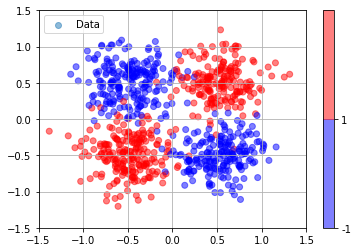

In [ ]:
xTrain, yTrain = generateBatchXor(800, sigma=0.25)
plotSvm(xTrain, yTrain)
xTest, yTest = generateBatchXor(200, sigma=0.25)

In [ ]:
class SoftSvmClassifier:
    
    def __init__(self, C):
        self.C = C                                 # <---
        self.alpha = None
        self.w = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # Gram matrix of (X.y)
        Xy = X * y[:, np.newaxis]
        GramXy = np.matmul(Xy, Xy.T)

        # Lagrange dual problem
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -Ld0dAlpha(GramXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis=0)  
        epsilon = 1e-6
        self.supportVectors = X[self.alpha > epsilon]
        # Support vectors is at a distance <= 1 to the separation plan
        # => use min support vector to compute the intercept, assume label is in {-1, 1}
        signedDist = np.matmul(self.supportVectors, self.w)
        minDistArg = np.argmin(signedDist)
        supportLabels = y[self.alpha > epsilon]
        self.intercept = supportLabels[minDistArg] - signedDist[minDistArg]
        #self.intercept = median(supportLabels-signedDist)
    
    def predict(self, X):
        """ Predict y value in {-1, 1} """
        assert(self.w is not None)
        assert(self.w.shape[0] == X.shape[1])
        activation = X.dot(self.w)+self.intercept
        return 2 * (activation>0) -1

In [ ]:
model1_soft = SoftSvmClassifier(C=1)
model1_soft.fit(xTrain, yTrain)

The linear separators are sometimes mitigating the issue by isolating a single class within a corner. Because the line cannot separate these data at all. Almost all line will give 50% error. 

Number of support vectors = 496


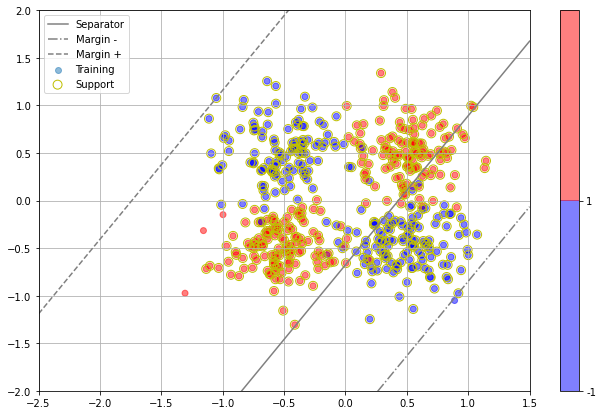

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 7))
plotSvm(xTrain, yTrain, model1_soft.supportVectors, model1_soft.w, model1_soft.intercept, label='Training', ax=ax, bound=[[-2.5, 1.5], [-2, 2]])


In [ ]:
def plotHeatMap(X, classes, title=None, fmt='.2g', ax=None, xlabel=None, ylabel=None):
    """ Fix heatmap plot from Seaborn with pyplot 3.1.0, 3.1.1
        https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
    """
    ax = sns.heatmap(X, xticklabels=classes, yticklabels=classes, annot=True, \
                     fmt=fmt, cmap=plt.cm.Blues, ax=ax) #notation: "annot" not "annote"
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
def plotConfusionMatrix(yTrue, yEst, classes, title=None, fmt='.2g', ax=None):
    plotHeatMap(metrics.confusion_matrix(yTrue, yEst), classes, title, fmt, ax, xlabel='Estimations', \
                ylabel='True values');

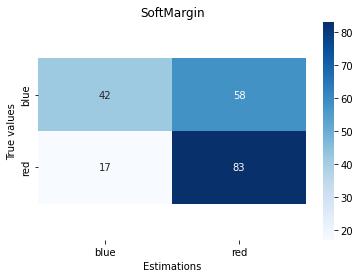

In [ ]:
yEst = model1_soft.predict(xTest)
title = 'SoftMargin'
fig, axes = plt.subplots( figsize=(6, 4))
plotConfusionMatrix(yTest, yEst, colors, title, ax=axes)

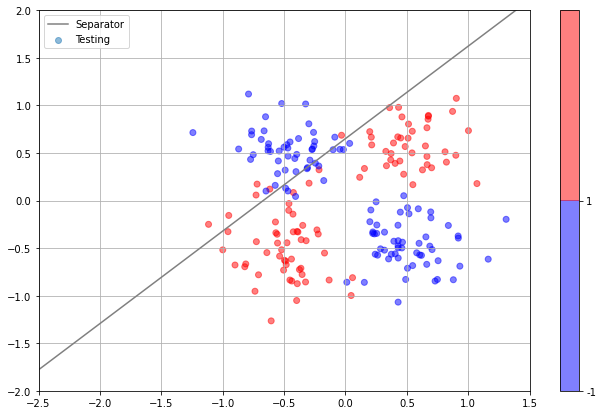

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 7))
plotSvm(xTest, yTest, None, model1_soft.w, model1_soft.intercept, label='Testing', ax=ax,bound=[[-2.5, 1.5], [-2, 2]])

In [ ]:
class KernelSvmClassifier:
    
    def __init__(self, C, kernel):
        self.C = C                               
        self.kernel = kernel          # <---
        self.alpha = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # --->
        # Gram matrix of h(x) y
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)   
        yp = y.reshape(-1, 1)
        GramHXy = hXX * np.matmul(yp, yp.T) 
        # <---

        # Lagrange dual problem
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramHXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -Ld0dAlpha(GramHXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        # --->
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]
        # <---
        # in this case, the intercept is not much relavent since we are using inf dim already. 
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)
        
        d = np.apply_along_axis(predict1, 1, X) 
        return 2 * (d > 0) - 1
        # <---

In [ ]:
def GRBF(x1, x2,sigma_square=1/2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) / (2*sigma_square))

model_kernel = KernelSvmClassifier(C=5, kernel=GRBF)
model_kernel.fit(xTrain, yTrain)

Number of support vectors = 81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


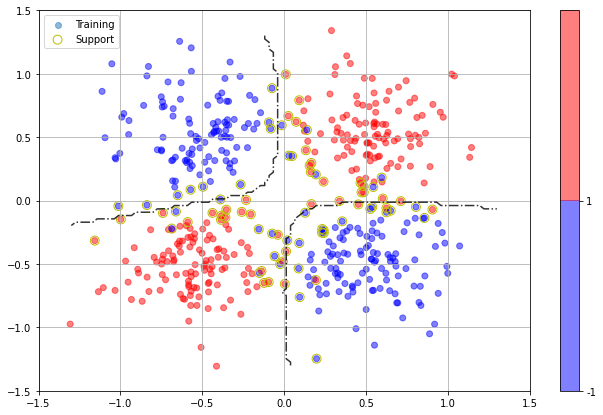

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 7))
plotSvm(xTrain, yTrain, support=model_kernel.supportVectors, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1.3, 1.3, 100)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model_kernel.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 1], alpha=0.8, linestyles=['-.', '-']);

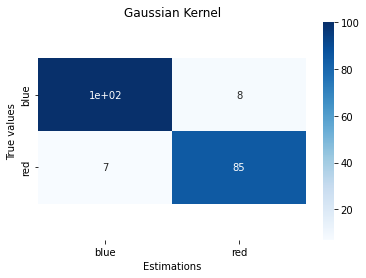

In [ ]:
yEst = model_kernel.predict(xTest)
title = 'Gaussian Kernel'
fig, axes = plt.subplots( figsize=(6, 4))
plotConfusionMatrix(yTest, yEst, colors, title, ax=axes)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: No contour levels were found within the data range.
  This is separate from the ipykernel package so we can avoid doing imports until


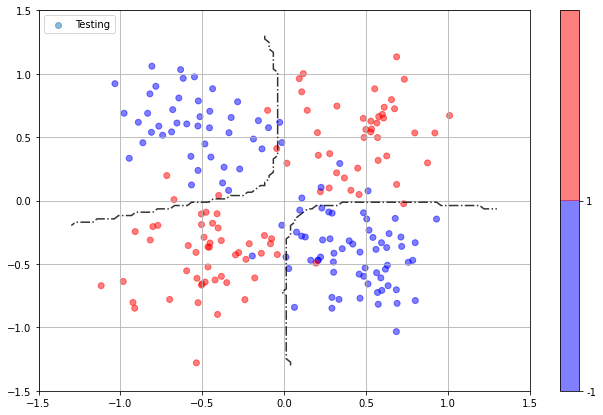

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 7))
plotSvm(xTest, yTest, label='Testing', ax=ax)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 1], alpha=0.8, linestyles=['-.', '-']);